In [9]:
import control
import torch
import numpy as np
from torch.utils.data import DataLoader
from net_identification_utils import FCnet, train, test, ControlDataset, plot_discrete_output, generate_data

In [5]:
system = control.TransferFunction(np.array([1, 0]), np.array([1, -7/12, 1/4, -1/24]), 1)

In [6]:
control.margin(system)

(0.625, 36.67860882036618, 0.0, 1.036960862501573)

In [12]:
train_dataset = generate_data(
    control_sys=system,
    impact_time=90,
    cooldown_time=10,
    n_signals=1000,                                                            # frequency range
    u_signal_generation_func=lambda x: np.sin(np.arange(x) * np.random.uniform(low=0.05, high=0.1)) / 2
)

In [13]:
train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)

In [15]:
model = FCnet(input_size=train_dataset[0][0].size()[0], output_size=train_dataset[0][1].size()[0], n_layers=5, layer_size=50)

In [17]:
train(model, 100, train_dataloader, torch.nn.MSELoss())

epoch 0, mse 0.05680515223648399
epoch 1, mse 0.002178471369552426
epoch 2, mse 0.0006341058714315295
epoch 3, mse 0.00045961356750922277
epoch 4, mse 0.00032680332209565675
epoch 5, mse 0.00021129887289134786
epoch 6, mse 0.00012096183556423057
epoch 7, mse 7.182434721471509e-05
epoch 8, mse 4.7477252355747626e-05
epoch 9, mse 3.171596046740888e-05
epoch 10, mse 3.388657702089404e-05
epoch 11, mse 2.8413938016456085e-05
epoch 12, mse 5.216571653363644e-05
epoch 13, mse 3.995032715465641e-05
epoch 14, mse 2.450760115607409e-05
epoch 15, mse 2.5500338124402334e-05
epoch 16, mse 2.1685371993953595e-05
epoch 17, mse 2.458435575135809e-05
epoch 18, mse 4.9260043233516626e-05
epoch 19, mse 1.558787012072571e-05
epoch 20, mse 2.246299240141525e-05
epoch 21, mse 5.355392871933873e-05
epoch 22, mse 6.213123121597164e-05
epoch 23, mse 9.075142063011299e-05
epoch 24, mse 4.779075212354655e-05
epoch 25, mse 1.4788880644118763e-05
epoch 26, mse 1.4152881512927706e-05
epoch 27, mse 5.44298338354565

In [20]:
test_dataset = generate_data(
    control_sys=system,
    impact_time=90,
    cooldown_time=10,
    n_signals=1000,                                                            # frequency range
    u_signal_generation_func=lambda x: np.sin(np.arange(x) * np.random.uniform(low=0.05, high=0.1)) / 2
)

In [21]:
test_dataloader = DataLoader(test_dataset, batch_size=1)

среднее MSE для одного сигнала на сгенерированной тестовой выборке

In [91]:
test(model, test_dataloader, nn.MSELoss())

1.1196042208666767e-05

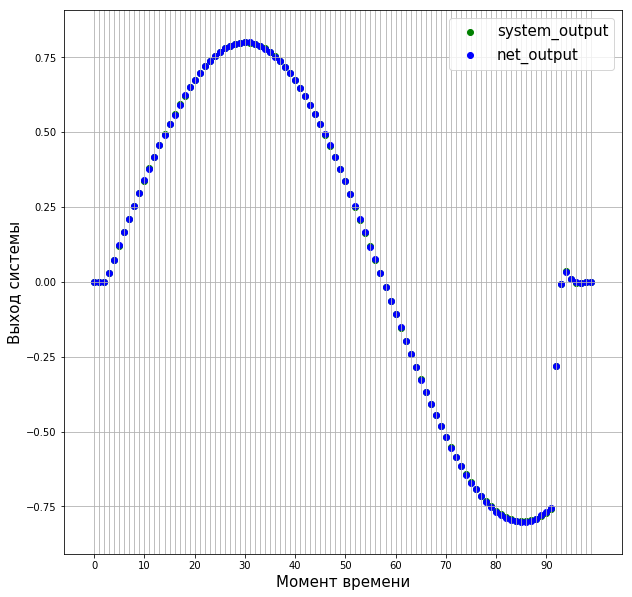

In [24]:
plot_discrete_output(
    system_output=test_dataset[2][1],
    net_output=model(test_dataset[2][0])
    # file_name='fcnet_prediction.png'
)
# actually perfect for simple system and not shifted test signal 
# (test signal frequency not shifted relative to train signal)

### prediction on input signal with shifted frequency relative to train data

In [39]:
test_dataset = generate_data(
    control_sys=system,
    impact_time=90,
    cooldown_time=10,
    n_signals=1000,                                                            # frequency range
    u_signal_generation_func=lambda x: np.sin(np.arange(x) * np.random.uniform(low=0.1, high=0.2)) / 2
)

In [40]:
test_dataloader = DataLoader(test_dataset, batch_size=1)

In [41]:
test(model, test_dataloader, torch.nn.MSELoss())

0.19516661121453216

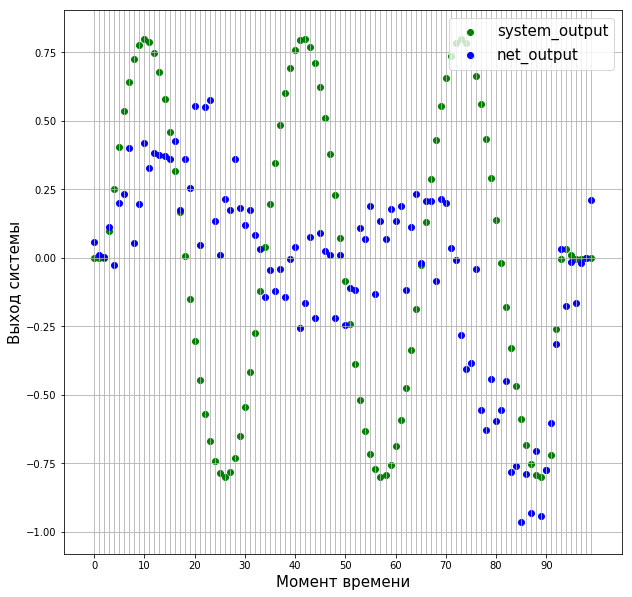

In [38]:
sample = generate_data(
    control_sys=system,
    impact_time=90,
    cooldown_time=10,
    n_signals=1,                                             # frequency
    u_signal_generation_func=lambda x: np.sin(np.arange(x) * 0.2) / 2
)
plot_discrete_output(
    system_output=sample[0][1],
    net_output=model(test_dataset[0][0]),
    # file_name='fcnet_prediction_shifted.png'
)
# prediction is not so relevant for high frequency (0.2)